<div style="width:100%;text-align: center;"> <img align=middle src="https://media.wired.com/photos/5926583dcfe0d93c4742fde3/master/w_2560%2Cc_limit/Alzheimers_TA.gif" alt="Heat beating" style="height:366px;margin-top:3rem;"> </div>

# <span style='color:aliceblue'><center style='background:#002E94;border-radius:0px 25px;padding:25px'> 🧠Alzheimer Classification with MRI Images </center></span>

# **<span style="color:#FF731D;">📰About the Dataset</span>**

A progressive disease that destroys memory and other important mental functions.
Brain cell connections and the cells themselves degenerate and die, eventually destroying memory and other important mental functions.

Memory loss and confusion are the main symptoms.
No cure exists, but medication and management strategies may temporarily improve symptoms.

The data consists of MRI images. The data has four classes of images both in training as well as a testing set:

> Mild Demented

> Moderate Demented

> Non Demented

> Very Mild Demented

In [2]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")
#Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [3]:
import pandas as pd
import os
from pathlib import Path
from PIL import Image, UnidentifiedImageError

data = "../input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"
image_dir = Path(data)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Load and process images
for img_p in filepaths:
    try:
        img = Image.open(img_p)
        # Perform any necessary image processing here
        # ...
    except UnidentifiedImageError:
        print(img_p)

In [6]:
image_df.head()

,Filepath,Label


In [10]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Filepath  0 non-null      object 
 1   Label     0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 124.0+ bytes


In [115]:
# image_df.describe()

In [15]:
image_df.shape

(0, 2)

In [88]:
image_df.columns

Index(['Filepath', 'Label'], dtype='object')

In [89]:
image_df.dtypes

Filepath    object
Label       object
dtype: object

In [90]:
image_df.isna().sum()

Filepath    0
Label       0
dtype: int64

In [57]:
image_df.duplicated().sum()

0

In [16]:
image_df.query('Label == "ModerateDemented"')

,Filepath,Label


In [95]:
#unique values
image_df['Label'].unique()

array(['ModerateDemented', 'NonDemented', 'VeryMildDemented',
       'MildDemented'], dtype=object)

In [99]:
# Set the image size
img_height = 224
img_width = 224


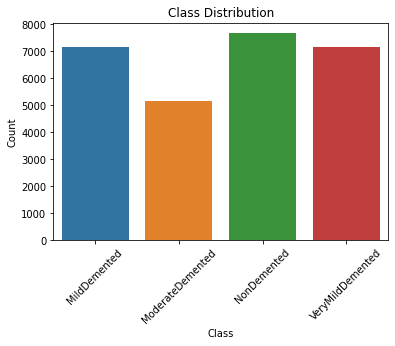

In [98]:
# Count the number of images in each class
class_counts = train_generator.classes
class_names = list(train_generator.class_indices.keys())

# Plot the class distribution
sns.countplot(x=class_counts)
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


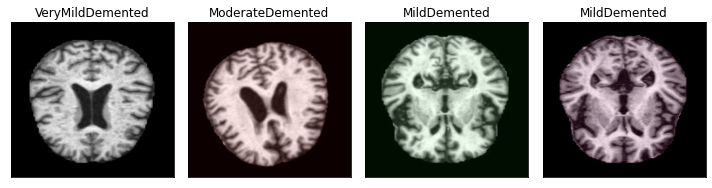

In [97]:
# Display 4 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 20)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [107]:
# Create the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=123
)

# Load the validation data
validation_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=123
)


Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


In [123]:
# Load the pre-trained ResNet50 model
base_model = ResNet50(include_top=False, input_shape=(img_height, img_width, 3), pooling='avg', weights='imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [124]:
# Create a new Sequential model
model = Sequential()

# Add the base model as a layer to the new model
model.add(base_model)

# Add additional layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))


In [125]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [126]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=10
)




Epoch 1/10
850/850 [==============================] - 183s 208ms/step - loss: 0.7567 - accuracy: 0.6604 - val_loss: 2.0014 - val_accuracy: 0.3830
Epoch 2/10
850/850 [==============================] - 171s 201ms/step - loss: 0.4544 - accuracy: 0.8079 - val_loss: 5.6631 - val_accuracy: 0.3584
Epoch 3/10
850/850 [==============================] - 176s 207ms/step - loss: 0.3048 - accuracy: 0.8806 - val_loss: 0.5289 - val_accuracy: 0.8044
Epoch 4/10
850/850 [==============================] - 171s 201ms/step - loss: 0.2073 - accuracy: 0.9223 - val_loss: 0.4828 - val_accuracy: 0.8193
Epoch 5/10
850/850 [==============================] - 172s 202ms/step - loss: 0.1566 - accuracy: 0.9433 - val_loss: 0.4552 - val_accuracy: 0.8523
Epoch 6/10
850/850 [==============================] - 172s 202ms/step - loss: 0.1081 - accuracy: 0.9595 - val_loss: 0.9323 - val_accuracy: 0.7453
Epoch 7/10
850/850 [==============================] - 173s 203ms/step - loss: 0.0994 - accuracy: 0.9645 - val_loss: 0.4683 -

In [127]:
# Print accuracy
print("Accuracy: ", history.history['accuracy'][-1])

Accuracy:  0.9732970595359802
